In [301]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [302]:
np.random.seed(0)

In [303]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [304]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [305]:
assert(X_train.shape[0]==y_train.shape[0])," The number of images is not equal to the number of labels."
assert(X_test.shape[0]==y_test.shape[0]),"The number of images is not equal to the number of labels."
assert(X_train.shape[1:]==(28,28)),"The dimensions of the images are not 28x28"
assert(X_test.shape[1:]==(28,28)),"The dimensions of the images are not 28x28"

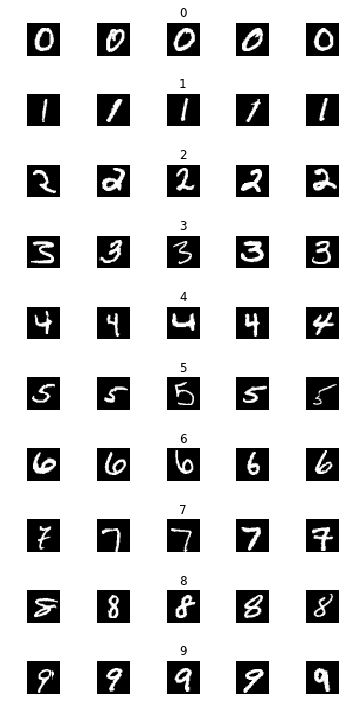

In [306]:
num_of_samples=[]
cols=5
num_classes=10
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range (cols):
    for j in range(num_classes):
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

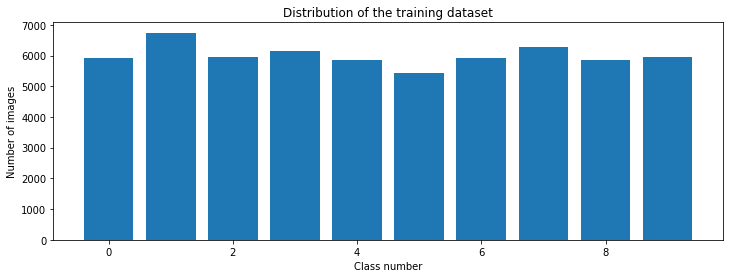

In [307]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [308]:
print(y_train)

[5 0 4 ... 5 6 8]


In [309]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [310]:
X_train=X_train/255
X_test=X_test/255

In [311]:
num_pixels=784
X_train=X_train.reshape(X_train.shape[0],num_pixels)
print(X_train.shape)
X_test=X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)

(60000, 784)
(60000, 784)


In [312]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=num_pixels,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.0075),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [313]:
model=create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_75 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_76 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [314]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=8,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 2s 32us/step - loss: 0.6319 - acc: 0.8069 - val_loss: 0.2810 - val_acc: 0.9188
Epoch 2/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.3244 - acc: 0.9044 - val_loss: 0.2461 - val_acc: 0.9287
Epoch 3/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.2772 - acc: 0.9170 - val_loss: 0.2207 - val_acc: 0.9370
Epoch 4/8
54000/54000 [==============================] - 1s 15us/step - loss: 0.2597 - acc: 0.9220 - val_loss: 0.2029 - val_acc: 0.9383
Epoch 5/8
54000/54000 [==============================] - 1s 15us/step - loss: 0.2462 - acc: 0.9256 - val_loss: 0.2005 - val_acc: 0.9383
Epoch 6/8
54000/54000 [==============================] - 1s 16us/step - loss: 0.2357 - acc: 0.9292 - val_loss: 0.2124 - val_acc: 0.9350
Epoch 7/8
54000/54000 [==============================] - 1s 15us/step - loss: 0.2262 - acc: 0.9308 - val_loss: 0.1998 - val_acc: 0.9357

Text(0.5,0,'epoch')

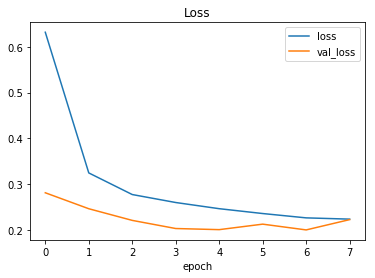

In [315]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [316]:
score=model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print('test score:',score[0])
print('test accuracy',score[1])

<class 'list'>
test score: 0.2806615928724408
test accuracy 0.9152


<Response [200]>


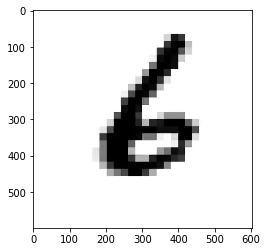

In [317]:
import requests
from PIL import Image
url='https://i.stack.imgur.com/Ds5Rc.png'
response=requests.get(url,stream=True)
print(response)
img=Image.open(response.raw)
plt.imshow(img)

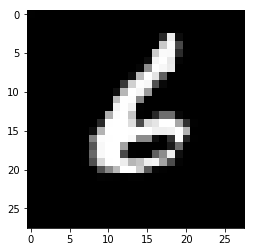

In [320]:
import cv2
img_array=np.asarray(img)
resized=cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

In [321]:
image=image/255
image=image.reshape(1,784)
prediction=model.predict_classes(image)
print("predicted digit:",str(prediction))

predicted digit: [6]
